<a href="https://colab.research.google.com/github/johan-stph/thesis/blob/main/cgan_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
# Transform to tensor and normalize
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Create dataloader
dataloader = DataLoader(mnist, batch_size=32, shuffle=True)


In [3]:
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.label_emb = nn.Embedding(10, 10)
        
        self.model = nn.Sequential(
            nn.Linear(input_dim + 10, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )
    
    def forward(self, z, labels):
        c = self.label_emb(labels)
        x = torch.cat([z, c], 1)
        return self.model(x)
    
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.label_emb = nn.Embedding(10, 10)
        
        self.model = nn.Sequential(
            nn.Linear(input_dim + 10, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x, labels):
        c = self.label_emb(labels)
        x = torch.cat([x, c], 1)
        return self.model(x)


In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

generator = Generator(100, 28*28).to(device)
discriminator = Discriminator(28*28).to(device)

g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002)
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0002)

criterion = nn.BCELoss()


Epoch [1/100], d_loss: 0.3993, g_loss: 3.5476
Epoch [2/100], d_loss: 0.1914, g_loss: 3.4378
Epoch [3/100], d_loss: 0.4870, g_loss: 2.8615
Epoch [4/100], d_loss: 0.6784, g_loss: 1.7907
Epoch [5/100], d_loss: 1.1796, g_loss: 1.2678


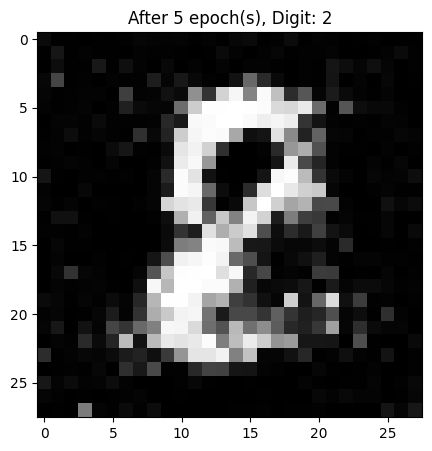

Epoch [6/100], d_loss: 0.7674, g_loss: 1.8448
Epoch [7/100], d_loss: 0.9147, g_loss: 1.3221
Epoch [8/100], d_loss: 0.8420, g_loss: 1.2466
Epoch [9/100], d_loss: 0.9938, g_loss: 1.3281
Epoch [10/100], d_loss: 0.8675, g_loss: 1.7024


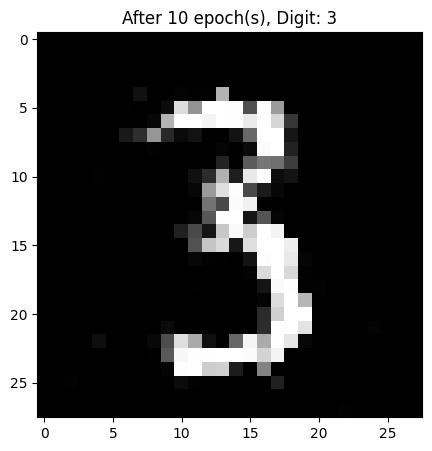

Epoch [11/100], d_loss: 1.4315, g_loss: 0.9924
Epoch [12/100], d_loss: 1.1522, g_loss: 1.0559
Epoch [13/100], d_loss: 1.0881, g_loss: 0.9490
Epoch [14/100], d_loss: 1.1584, g_loss: 1.0232
Epoch [15/100], d_loss: 1.0746, g_loss: 0.9346


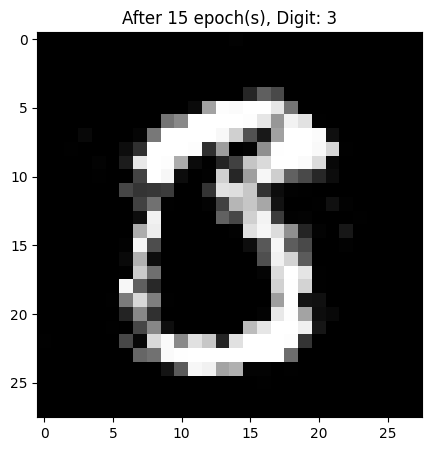

Epoch [16/100], d_loss: 1.3452, g_loss: 1.1641
Epoch [17/100], d_loss: 1.2968, g_loss: 0.7644
Epoch [18/100], d_loss: 1.2670, g_loss: 0.8710
Epoch [19/100], d_loss: 1.1891, g_loss: 0.9420
Epoch [20/100], d_loss: 1.2680, g_loss: 0.8360


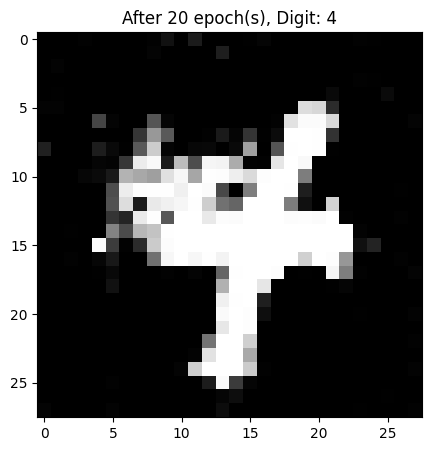

Epoch [21/100], d_loss: 1.2773, g_loss: 0.6778
Epoch [22/100], d_loss: 1.3799, g_loss: 0.8088
Epoch [23/100], d_loss: 1.2520, g_loss: 0.8062
Epoch [24/100], d_loss: 1.3009, g_loss: 0.9306
Epoch [25/100], d_loss: 1.4315, g_loss: 1.0389


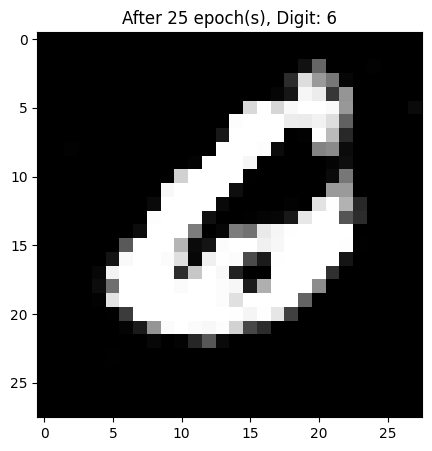

Epoch [26/100], d_loss: 1.0715, g_loss: 1.1208
Epoch [27/100], d_loss: 1.2302, g_loss: 0.7930
Epoch [28/100], d_loss: 1.3405, g_loss: 0.7423
Epoch [29/100], d_loss: 1.2906, g_loss: 1.0933
Epoch [30/100], d_loss: 1.2121, g_loss: 0.7709


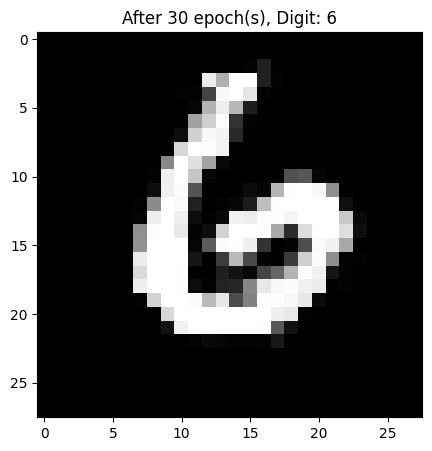

Epoch [31/100], d_loss: 1.2903, g_loss: 0.9367
Epoch [32/100], d_loss: 1.3905, g_loss: 0.9241
Epoch [33/100], d_loss: 1.2245, g_loss: 0.9129
Epoch [34/100], d_loss: 1.3844, g_loss: 0.7654
Epoch [35/100], d_loss: 1.2530, g_loss: 0.8403


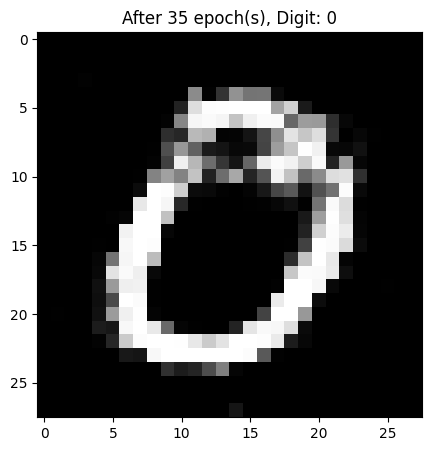

Epoch [36/100], d_loss: 1.3750, g_loss: 0.7685
Epoch [37/100], d_loss: 1.2289, g_loss: 0.8566
Epoch [38/100], d_loss: 1.2548, g_loss: 0.9385
Epoch [39/100], d_loss: 1.3240, g_loss: 0.7462
Epoch [40/100], d_loss: 1.3276, g_loss: 0.7491


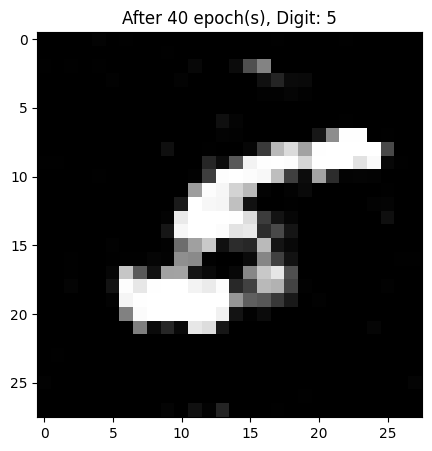

Epoch [41/100], d_loss: 1.4273, g_loss: 0.7913
Epoch [42/100], d_loss: 1.3897, g_loss: 0.8895
Epoch [43/100], d_loss: 1.2966, g_loss: 0.8884
Epoch [44/100], d_loss: 1.3334, g_loss: 0.8169
Epoch [45/100], d_loss: 1.2895, g_loss: 0.6876


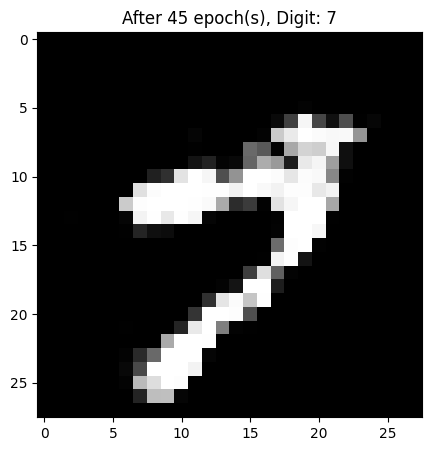

Epoch [46/100], d_loss: 1.3058, g_loss: 0.7376
Epoch [47/100], d_loss: 1.4034, g_loss: 0.6396
Epoch [48/100], d_loss: 1.3185, g_loss: 0.8378
Epoch [49/100], d_loss: 1.4925, g_loss: 0.9114
Epoch [50/100], d_loss: 1.2970, g_loss: 0.7821


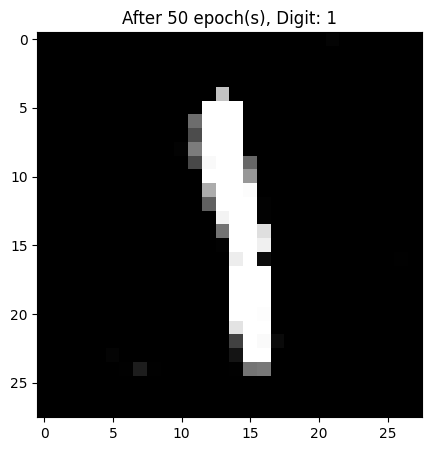

Epoch [51/100], d_loss: 1.2813, g_loss: 1.0743
Epoch [52/100], d_loss: 1.1518, g_loss: 0.7925
Epoch [53/100], d_loss: 1.4521, g_loss: 0.7798
Epoch [54/100], d_loss: 1.2578, g_loss: 0.7399
Epoch [55/100], d_loss: 1.2729, g_loss: 0.7401


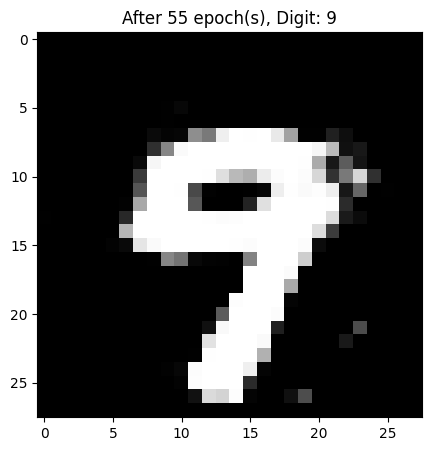

Epoch [56/100], d_loss: 1.3103, g_loss: 0.7637
Epoch [57/100], d_loss: 1.3621, g_loss: 0.7414
Epoch [58/100], d_loss: 1.2475, g_loss: 0.7652
Epoch [59/100], d_loss: 1.4233, g_loss: 0.8329
Epoch [60/100], d_loss: 1.2905, g_loss: 0.8343


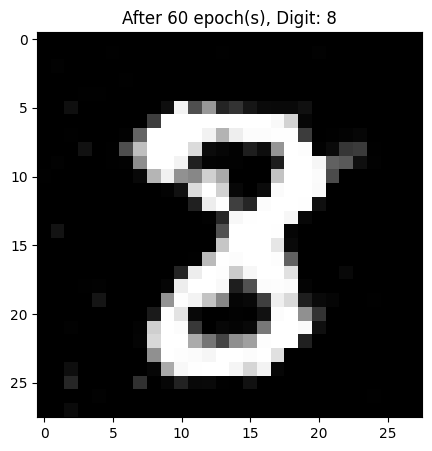

Epoch [61/100], d_loss: 1.2200, g_loss: 0.8437
Epoch [62/100], d_loss: 1.2986, g_loss: 0.7584
Epoch [63/100], d_loss: 1.2948, g_loss: 0.8785
Epoch [64/100], d_loss: 1.3348, g_loss: 0.7972
Epoch [65/100], d_loss: 1.3634, g_loss: 0.8064


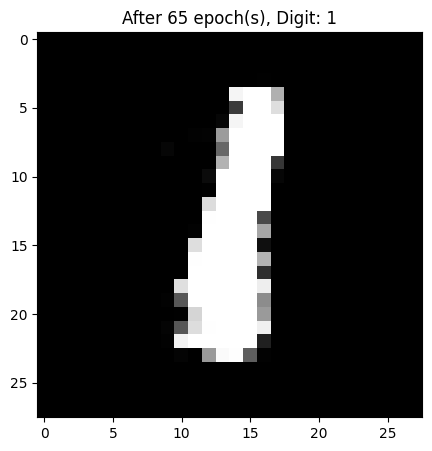

Epoch [66/100], d_loss: 1.2762, g_loss: 0.9045
Epoch [67/100], d_loss: 1.3913, g_loss: 0.7201
Epoch [68/100], d_loss: 1.3513, g_loss: 0.7156
Epoch [69/100], d_loss: 1.4159, g_loss: 0.9094
Epoch [70/100], d_loss: 1.4625, g_loss: 0.5686


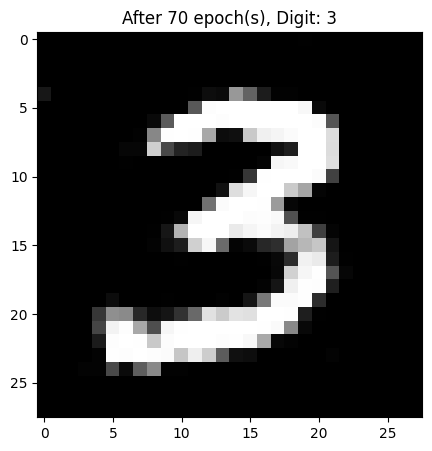

Epoch [71/100], d_loss: 1.4254, g_loss: 0.6864
Epoch [72/100], d_loss: 1.2915, g_loss: 0.8146
Epoch [73/100], d_loss: 1.3297, g_loss: 0.8729
Epoch [74/100], d_loss: 1.2495, g_loss: 0.7315
Epoch [75/100], d_loss: 1.3235, g_loss: 0.8070


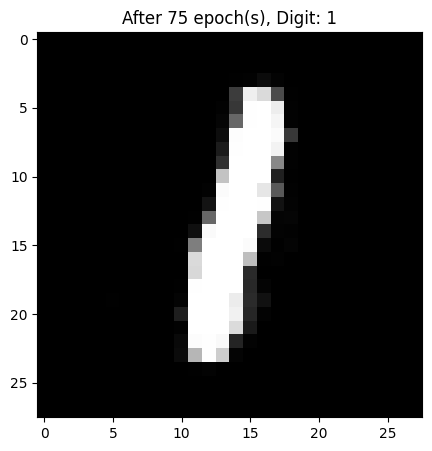

Epoch [76/100], d_loss: 1.2422, g_loss: 0.7911
Epoch [77/100], d_loss: 1.2748, g_loss: 0.8468
Epoch [78/100], d_loss: 1.3326, g_loss: 0.7165
Epoch [79/100], d_loss: 1.3713, g_loss: 0.7797
Epoch [80/100], d_loss: 1.3145, g_loss: 0.7534


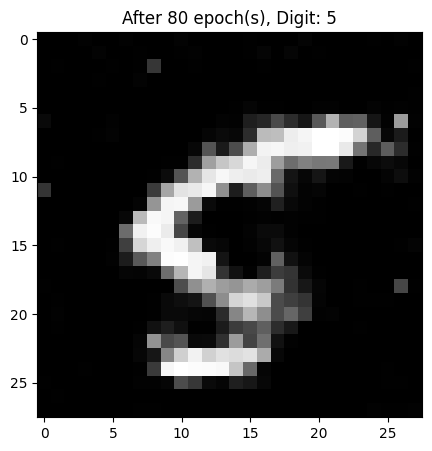

Epoch [81/100], d_loss: 1.2758, g_loss: 0.9028
Epoch [82/100], d_loss: 1.2983, g_loss: 0.7575
Epoch [83/100], d_loss: 1.3329, g_loss: 0.8187
Epoch [84/100], d_loss: 1.4552, g_loss: 0.7674
Epoch [85/100], d_loss: 1.3035, g_loss: 0.7798


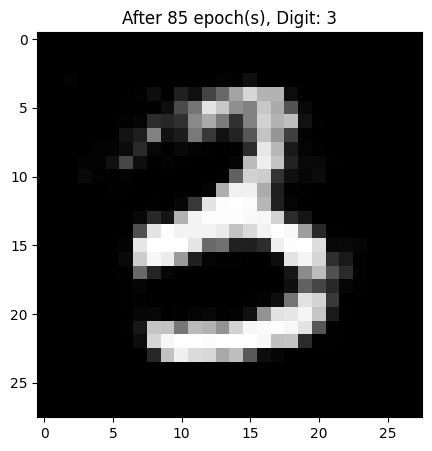

Epoch [86/100], d_loss: 1.3355, g_loss: 0.8119
Epoch [87/100], d_loss: 1.4761, g_loss: 0.7919
Epoch [88/100], d_loss: 1.5102, g_loss: 0.6981
Epoch [89/100], d_loss: 1.4022, g_loss: 0.7350
Epoch [90/100], d_loss: 1.3513, g_loss: 0.7720


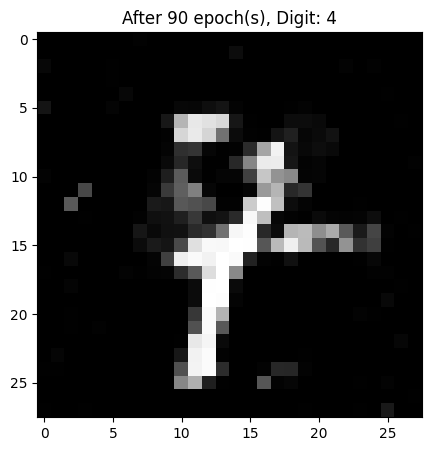

Epoch [91/100], d_loss: 1.2809, g_loss: 0.6923
Epoch [92/100], d_loss: 1.3056, g_loss: 0.7500
Epoch [93/100], d_loss: 1.4267, g_loss: 0.7845
Epoch [94/100], d_loss: 1.2294, g_loss: 0.7732
Epoch [95/100], d_loss: 1.3613, g_loss: 0.7125


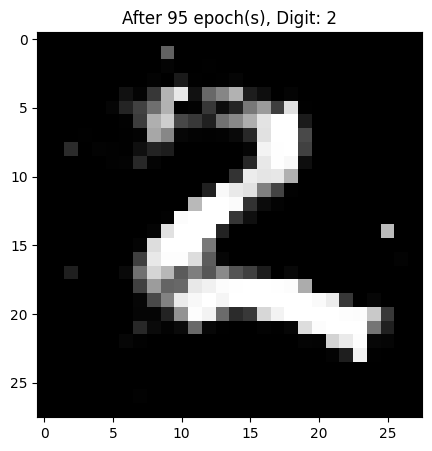

Epoch [96/100], d_loss: 1.3053, g_loss: 0.8097
Epoch [97/100], d_loss: 1.3195, g_loss: 0.8072
Epoch [98/100], d_loss: 1.2547, g_loss: 0.7221
Epoch [99/100], d_loss: 1.1990, g_loss: 0.8738
Epoch [100/100], d_loss: 1.3344, g_loss: 0.8218


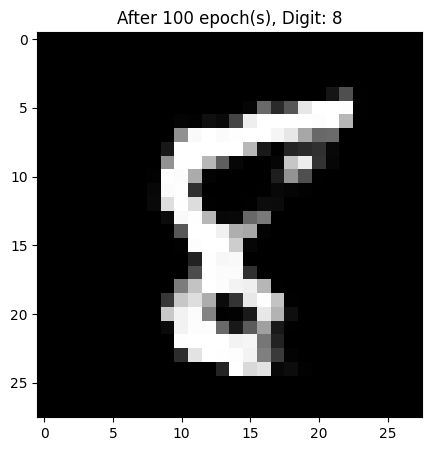

In [5]:
num_epochs = 100

for epoch in range(num_epochs):
    for batch_idx, (real_images, labels) in enumerate(dataloader):
        batch_size = real_images.size(0)
        real_images = real_images.view(batch_size, -1).to(device)
        labels = labels.to(device)

        # Labels for real images: 1, for fake images: 0
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train discriminator
        outputs = discriminator(real_images, labels)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs
        
        z = torch.randn(batch_size, 100).to(device)
        fake_images = generator(z, labels)
        outputs = discriminator(fake_images, labels)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
        
        # Train generator
        z = torch.randn(batch_size, 100).to(device)
        fake_images = generator(z, labels)
        outputs = discriminator(fake_images, labels)
        
        g_loss = criterion(outputs, real_labels)
        
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")
    
    # Visualize the generated image after each 5th epoch
    if (epoch+1) % 5 == 0:
        with torch.no_grad():
            z = torch.randn(1, 100).to(device)
            labels = torch.randint(0, 10, (1,)).to(device)
            generated_images = generator(z, labels)
            generated_images = generated_images.detach().cpu()
            img = generated_images.view(generated_images.size(0), 28, 28)
            plt.figure(figsize=(5,5))
            plt.imshow(img[0], cmap='gray')
            plt.title(f"After {epoch+1} epoch(s), Digit: {labels.item()}")
            plt.show()



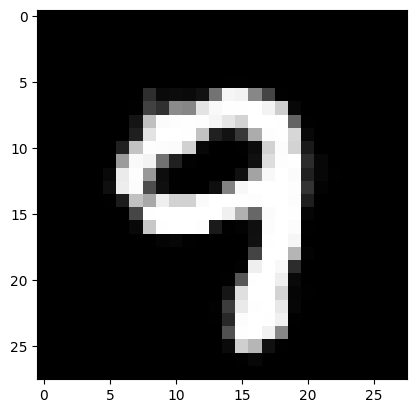

In [31]:
generator.eval()

# Create a batch of noise vectors
z = torch.randn(1, 100).to(device)


labels = torch.LongTensor([9]).to(device)

# Generate a batch of images from the noise vectors
generated_images = generator(z, labels)

# Detach the images from the computation graph and move them to the CPU
generated_images = generated_images.detach().cpu()

# Plot the generated images
plt.imshow(generated_images[0].view(28, 28), cmap='gray')
plt.show()
